In [1]:
import pyspark
import pandas as pd

In [2]:
from pyspark.sql import SparkSession, functions as f

In [3]:
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/26 00:38:19 WARN Utils: Your hostname, DESKTOP-4QJNQQU resolves to a loopback address: 127.0.1.1; using 172.17.224.94 instead (on interface eth0)
22/08/26 00:38:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/26 00:38:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Inspecting the Yellow dataset

# Inspecting HVFHV dataset 

In [4]:
hvfhv = spark.read.parquet('../../ADS_Project_1/raw_data/hvfhv')
display(hvfhv.limit(10))
print(f'Shape of hvfhv dataset is {hvfhv.count()} rows x {len(hvfhv.columns)} columns')

hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
HV0003,B03404,B03404,2022-01-01 00:05:31,2022-01-01 00:05:40,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,1.18,664,24.9,0.0,0.75,2.21,2.75,0.0,0.0,23.03,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:19:27,2022-01-01 00:22:08,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,0.82,460,11.97,0.0,0.36,1.06,2.75,0.0,0.0,12.32,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:43:53,2022-01-01 00:57:37,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,1.18,595,29.82,0.0,0.89,2.65,2.75,0.0,0.0,23.3,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:15:36,2022-01-01 00:17:08,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,1.65,303,7.91,0.0,0.24,0.7,2.75,0.0,0.0,6.3,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:25:45,2022-01-01 00:26:01,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,1.65,461,9.44,0.0,0.28,0.84,2.75,0.0,0.0,7.44,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:34:44,2022-01-01 00:36:52,2022-01-01 00:38:50,2022-01-01 00:51:32,263,79,4.51,762,17.67,0.0,0.53,1.57,2.75,0.0,0.0,12.25,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:47:51,2022-01-01 00:52:00,2022-01-01 00:53:25,2022-01-01 01:08:56,113,140,3.68,931,16.68,0.0,0.5,1.48,2.75,0.0,0.0,12.75,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:06:21,2022-01-01 00:06:58,2022-01-01 00:08:58,2022-01-01 00:23:01,151,75,2.77,843,14.41,0.0,0.43,1.28,0.0,0.0,4.0,11.47,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:27:54,2022-01-01 00:30:26,2022-01-01 00:32:25,2022-01-01 00:44:15,263,229,2.04,710,10.64,0.0,0.32,0.94,2.75,0.0,0.0,9.55,N,N,,N,N
HV0003,B03404,B03404,2022-01-01 00:44:59,2022-01-01 00:48:23,2022-01-01 00:50:23,2022-01-01 01:15:30,237,169,8.79,1507,107.56,0.0,0.83,2.45,2.75,0.0,0.0,23.67,N,N,,N,N


Shape of hvfhv dataset is 66976983 rows x 24 columns


# Inspecting property data

# Preprocessing Steps -

# 1. Reading in the data
The two datasets used for this analysis are:
### Yellow NYC Taxi trip data
Consists of 4 months (Jan - Apr 2022) of trip data, in the form of 4 parquet files - one for each month. However with PySpark, the entire directory is allowed to be read in at once, concatenating the data into one large dataframe

In [5]:
yellow = spark.read.parquet('../../ADS_Project_1/raw_data/tlc_yellow')
display(yellow.limit(10))
print(f'Shape of yellow dataset is {yellow.count()} rows x {len(yellow.columns)} columns')

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.0,0.0,0.3,13.3,0.0,0.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.0,0.0,0.3,11.8,2.5,0.0
2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.3,1.0,N,68,163,1,23.5,0.5,0.5,3.0,0.0,0.3,30.3,2.5,0.0
1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.3,1.0,N,138,161,1,33.0,3.0,0.5,13.0,6.55,0.3,56.35,2.5,0.0
2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.2,0.0,0.3,26.0,2.5,0.0
2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.0,0.5,0.5,0.0,0.0,0.3,12.8,2.5,0.0
2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,N,166,236,1,12.0,0.5,0.5,2.25,0.0,0.3,18.05,2.5,0.0
2,2022-01-01 00:48:52,2022-01-01 00:53:28,1.0,0.78,1.0,N,236,141,2,5.0,0.5,0.5,0.0,0.0,0.3,8.8,2.5,0.0


Shape of yellow dataset is 12671164 rows x 19 columns


### NYC Property Sale data
Consists of a year (Aug 21 - July 22) of sale data, in the form of 5 excel files - one for each borough. Since this data is in a different format, it will be manually concatenated into a larger, overarching dataframe

### *PLEASE NOTE*
At this step, please see instructions below on manually preparing the data for reading these excel files in. These instructions can also be found in the `ReadMe`

- Run the download script in `download_script` to get the files on your machine
- Open the first property file (named after one of NYC's 5 boroughs)
- Select the first 4 rows of the Excel spreadsheet by clicking, holding and dragging down from the `1` to the `4` on the left
- Right click the selection you just made and click `Delete`
- Save the file with `CTRL + S`
- Repeat for the other borough files

In [6]:
'''
# This cell runs for a while
boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'statenisland']
for borough in boroughs:
    borough = pd.read_excel(f'../raw_data/property_data/{borough}.xlsx')
'''

"\n# This cell runs for a while\nboroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'statenisland']\nfor borough in boroughs:\n    borough = pd.read_excel(f'../raw_data/property_data/{borough}.xlsx')\n"

In [7]:
# Initialising the overarching property dataset
property = pd.DataFrame()

# Reading in each borough and scaffolding to make sure concatenation is correct
bronx = pd.read_excel('../raw_data/property_data/bronx.xlsx')
print('Dimensions are:\n')
print(f'Bronx: {bronx.shape}')
brooklyn = pd.read_excel('../raw_data/property_data/brooklyn.xlsx')
print(f'Brooklyn: {brooklyn.shape}')
manhattan = pd.read_excel('../raw_data/property_data/manhattan.xlsx')
print(f'Manhattan: {manhattan.shape}')
queens = pd.read_excel('../raw_data/property_data/queens.xlsx')
print(f'Queens: {queens.shape}')
statenisland = pd.read_excel('../raw_data/property_data/statenisland.xlsx')
print(f'Staten Island: {statenisland.shape}\n\n')

# Concatenating them all
property = bronx
property = pd.concat([property, brooklyn])
property = pd.concat([property, manhattan])
property = pd.concat([property, queens])
property = pd.concat([property, statenisland])

tot = 7651 + 28557 + 23370 + 29983 + 8964
print(f'So `property` df (all individual boroughs stacked on top of each other) should be 7651 + 28557 + 29983 + 8964 = {tot}')
print(f'Property: {property.shape}')

if tot == property.shape[0]:
    print('Nice')

Dimensions are:

Bronx: (7651, 21)
Brooklyn: (28557, 21)
Manhattan: (23370, 21)
Queens: (29983, 21)
Staten Island: (8964, 21)


So `property` df (all individual boroughs stacked on top of each other) should be 7651 + 28557 + 29983 + 8964 = 98525
Property: (98525, 21)
Nice


In [8]:
# Can u do dfs in array?
[pd.DataFrame(bronx), pd.DataFrame(brooklyn)]

[      BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
 0           2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
 1           2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
 2           2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
 3           2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
 4           2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   
 ...       ...          ...                      ...                  ...   
 7646        2     WOODLAWN   14 RENTALS - 4-10 UNIT                   2A   
 7647        2     WOODLAWN       22 STORE BUILDINGS                    4   
 7648        2     WOODLAWN       22 STORE BUILDINGS                    4   
 7649        2     WOODLAWN    29 COMMERCIAL GARAGES                    4   
 7650        2     WOODLAWN    29 COMMERCIAL GARAGES                    4   
 
       BLOCK  LOT  EASEMENT BUILDING CLASS AT PRESENT                ADDRE

# Yellow Dataset -

In [9]:
yellow.limit(20)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.0,0.0,0.3,13.3,0.0,0.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.0,0.0,0.3,11.8,2.5,0.0
2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.3,1.0,N,68,163,1,23.5,0.5,0.5,3.0,0.0,0.3,30.3,2.5,0.0
1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.3,1.0,N,138,161,1,33.0,3.0,0.5,13.0,6.55,0.3,56.35,2.5,0.0
2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.2,0.0,0.3,26.0,2.5,0.0
2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.0,0.5,0.5,0.0,0.0,0.3,12.8,2.5,0.0
2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,N,166,236,1,12.0,0.5,0.5,2.25,0.0,0.3,18.05,2.5,0.0
2,2022-01-01 00:48:52,2022-01-01 00:53:28,1.0,0.78,1.0,N,236,141,2,5.0,0.5,0.5,0.0,0.0,0.3,8.8,2.5,0.0


## 1. Getting rid of unrelated data
We don't care about some attributes for the purposes of our analysis, so need to drop those specific columns

### Yellow data -
- VendorID
- Passenger_count: Assumption being made (based off personal experience) that even when multiple riders take an uber, only 1 rider (usually the one who requested the ride) tips the driver
- Store_and_fwd_flag
- Extra 
- MTA_tax
- Improvement_surcharge
- Tolls_amount
- Congestion_surcharge
- Airport_fee

In [10]:
yellow_drop_columns = ['VendorID', 'Passenger_count', 'Store_and_fwd_flag', 'Extra', 'MTA_Tax', 'Improvement_surcharge',\
                       'Tolls_amount', 'Congestion_surcharge', 'Airport_fee']

yellow = yellow.drop(*yellow_drop_columns)

### HVFHV data -
- hvfhs_license_num: License number is not relevant
- on_scene_datetime: On_scene refers to when a driver arrives at the designated pickup point, but the rider is not there yet. Often, charges will start after x minutes have passed. Although it would be interesting to see whether rides who make their driver wait tip better, however this is not something that should/would be intentionally increased, so not relevant
- request_datetime: This isn't important for this analysis. Would be very useful when looking into optimising rider wait times / something along those lines

The following flags provide information on various things. E.g - whether a ride was shared, whether it was attempted to be shared, and several others. These are ultimately irrelevant for this study
- shared_request_flag
- shared_match_flag
- access_a_ride_flag
- wav_request_flag
- wav_match_flag

### Property data -
The following attributes will be dropped because again, they are unrelevant and don't contribute to this study in a meaningful way. They could potentially be useful for other analyses though
- Tax Class at Present
- Block
- Lot
- Easement
- Building Class at Present
- Apartment Number
- ZIP Code
- Total Units: A linear combination of Residential and Commercial Unit (might still not end up using this attribute)
- Land Square Feet: Will instead use Gross Square Feet - assumption made that property valuations use area of land, not building
- Tax Class at Time of Sale
- Building Class at Time of Sale
- Sale Date

In [11]:
property_drop_columns = ['TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT', 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER',\
                        'ZIP CODE', 'TOTAL UNITS', 'LAND SQUARE FEET', 'TAX CLASS AT TIME OF SALE', \
                         'BUILDING CLASS AT TIME OF SALE', 'SALE DATE']

property.drop(columns = property_drop_columns, inplace = True)

## 2. Making consistent variable names

In [12]:
# Some column names are in CamelCase, so making it consistent and changing those over
yellow = yellow.withColumnRenamed(
    'RatecodeID',
    'ratecode_id'
)
yellow = yellow.withColumnRenamed(
    'PULocationID',
    'pulocation_id'
)
yellow = yellow.withColumnRenamed(
    'DOLocationID',
    'dolocation_id'
)

In [13]:
property.rename(columns={'BOROUGH':'borough', 'NEIGHBORHOOD':'neighbourhood', 'BUILDING CLASS CATEGORY':'building_class', \
                         'ADDRESS':'address', 'RESIDENTIAL UNITS':'resi_units', 'COMMERCIAL UNITS':'comm_units', \
                         'GROSS SQUARE FEET':'gross_sq_feet', 'YEAR BUILT':'year_built', 'SALE PRICE':'sale_price'}, \
                inplace=True)

## 2. Handling Missing / Null / NA Data -

## Yellow -

In [14]:
# Code taken from https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe

from pyspark.sql.functions import isnan, when, count, col

columns = ['trip_distance', 'ratecode_id', 'pulocation_id', 'dolocation_id', 'payment_type', 'fare_amount', 'tip_amount', \
          'total_amount']

yellow.select([count(when(isnan(c), c)).alias(c) for c in columns]).show()

# It looks like there are no null values here

+-------------+-----------+-------------+-------------+------------+-----------+----------+------------+
|trip_distance|ratecode_id|pulocation_id|dolocation_id|payment_type|fare_amount|tip_amount|total_amount|
+-------------+-----------+-------------+-------------+------------+-----------+----------+------------+
|            0|          0|            0|            0|           0|          0|         0|           0|
+-------------+-----------+-------------+-------------+------------+-----------+----------+------------+



## Property -

In [15]:
# Finding how many null values there are in each column 
display(property.isnull().sum())

borough               0
neighbourhood         0
building_class        0
address               0
resi_units        24303
comm_units        43507
gross_sq_feet     46660
year_built         7443
sale_price            0
dtype: int64

In [16]:
# Substantial number of null values for 3 columns, and some for 1

print('Percentage of null values each column:\n')
print(f'resi_units : {100 * (round(24303/property.shape[0], 2))}%')
print(f'comm_units : {100 * (round(43507/property.shape[0], 2))}%')
print(f'gross_sq_feet : {100 * (round(46660/property.shape[0], 2))}%')
print(f'year_built : {100 * (round(7443/property.shape[0], 2))}%')

Percentage of null values each column:

resi_units : 25.0%
comm_units : 44.0%
gross_sq_feet : 47.0%
year_built : 8.0%


- `resi_units`: 25% missing values. This feature tells us about how many units on the property were listed as for residential or commercial use. We will just drop this feature entirely, since I originally thought that the # of rooms would probably have a relationship with tip fare, however this would almost directly be correlated with total `sale_price` (more units = more sq footage = more expensive. Possibly an assumption, but a very safe one
- `comm_units`: See above
- `gross_sq_feet`: Looking at spread of data (see (& run) cell below), it's pretty safe to imput the data - follows an approximate Normal Distribution. However the outliers must be removed before imputation
- `year_built`: Values don't really follow a Normal Distribution (3 cells below), but I think that the feature would still offer some significant significance. Additionally, only 8% of the data would be mean-imputed, so I doubt it would affect the distribution all that much

# REMEMBER TO IMPUTE THIS COLUMN

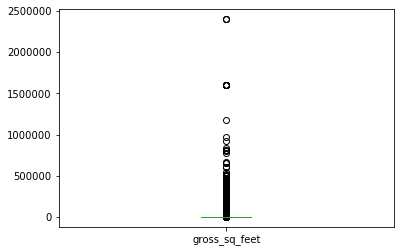

In [17]:
fig1 = property['gross_sq_feet'].plot.box()

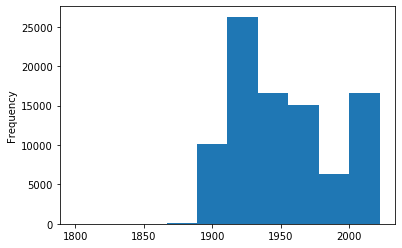

In [18]:
fig2 = property['year_built'].plot.hist()

In [19]:
# Dropping resi/comm_units
property = property.drop(columns = ['resi_units', 'comm_units'])

# Mean imputing year_built
year_mean = property['year_built'].mean()
property['year_built'] = property['year_built'].fillna(value = year_mean)

## 2. Typecasting
Making sure that all columns are appropriately typed

There are several columns that we need to adjust the type for. They'll be listed below with their justifications

### Yellow data -
- RatecodeIDs: int - Column is made only of integers
- Location IDs: int - See above

In [20]:
columns = ['ratecode_id', 'pulocation_id', 'dolocation_id']
for column in columns:
    yellow = yellow.withColumn(
        column,
        f.col(column).astype('INT')
    )

### Property data -
- year_built: int - See above

In [21]:
# Casting year_built column to int
property = property.astype({'year_built': int})

## Filtering

There are ___ attributes that change the data drastically depending on their value. They are:

- ratecode_id: Depending on the `ratecode_id`, the trip data refers to airport trips, group rides or negotiated fare. In an earlier assumption, I posited that shared rides wouldn't have an overt effect on fare / distance / tip, so left that in. However, airport trips and negotiated fares would. They also make up a tiny part of the overall dataset -
- payment_type: As this analysis is interested in tips, it has been provided in the data dictionary that tips are only recorded for payment_type = 1. That is, a credit card was used. Other values of payment_type have no tip recorded, and if put into a model, will introduce massive bias
- Manual inspection of the data also revealed that 

In [22]:
# Filtering relevant rows based on ratecode_id value and overwriting unfiltered yellow dataframe

df_1 = yellow.select('*').where(yellow['ratecode_id'] == 1)
df_2 = yellow.select('*').where(yellow['ratecode_id'] == 6)

original_yellow = yellow.count()

print(f'Full yellow dataset has {original_yellow} rows\n')
print(f'ratecode_id = 1 has {df_1.count()} rows')
print(f'ratecode_id = 2 has {df_2.count()} rows\n')

yellow = df_1.union(df_2)
print(f'Filtered yellow dataset has {yellow.count()} rows')
print(f'Should have {df_1.count() + df_2.count()} rows')

percentage = yellow.count() / original_yellow
print(f'{round(percentage * 100, 2)}% of rows retained')

Full yellow dataset has 12671164 rows

ratecode_id = 1 has 11705675 rows
ratecode_id = 2 has 109 rows

Filtered yellow dataset has 11705784 rows
Should have 11705784 rows
92.38% of rows retained


In [23]:
df_3 = yellow.select('*').where(yellow['payment_type'] == 1)

print(f'payment_type = 1 has {df_3.count()} rows')
print(f'Filtered yellow has {yellow.count()} rows')

print(f'{round(df_3.count() / yellow.count() * 100, 2)}% of rows retained')

yellow = yellow.select('*').where(yellow['payment_type'] == 1)

payment_type = 1 has 9244878 rows
Filtered yellow has 11705784 rows
78.98% of rows retained


In [24]:
# Negative amount values can be seen. Even for just these 10 rows displayed, if one were to make the argument that a - sign was
# input incorrectly, the tip_amount still far outweighs the total_amount in most cases. This is either money laundering or 
# errors

display(yellow.orderBy('total_amount').limit(10))

yellow = yellow.select('*').where(yellow['total_amount'] > 0)

# Follow similar (real-world) logic to filter out incorrect values for other attributes
yellow = yellow.select('*').where(yellow['trip_distance'] > 0)
yellow = yellow.select('*').where(yellow['fare_amount'] > 0)
yellow = yellow.select('*').where(yellow['tip_amount'] > 0)

percentage = round(yellow.count() / original_yellow * 100, 2)
print(f'After all that, yellow is left with {yellow.count()}: {percentage}% of original size')

tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,ratecode_id,pulocation_id,dolocation_id,payment_type,fare_amount,tip_amount,total_amount
2022-03-04 00:02:00,2022-03-04 00:25:34,8.06,1,138,152,1,-26.0,-75.26,-110.36
2022-01-20 17:16:29,2022-01-20 17:23:30,1.18,1,249,125,1,-6.5,-98.01,-108.81
2022-02-27 14:53:46,2022-02-27 15:17:28,2.23,1,113,230,1,-15.5,-76.1,-94.9
2022-03-23 09:43:57,2022-03-23 10:24:32,13.23,1,186,182,1,-42.0,-45.3,-90.6
2022-04-01 17:29:49,2022-04-01 18:13:57,10.53,1,132,171,1,-36.5,-45.0,-84.55
2022-02-06 14:06:22,2022-02-06 14:08:51,0.34,1,13,13,1,-3.5,-68.2,-75.0
2022-03-11 05:41:29,2022-03-11 06:03:29,9.28,1,132,98,1,-27.0,-35.0,-64.55
2022-02-20 06:03:40,2022-02-20 06:27:19,6.4,1,186,217,1,-23.0,-27.0,-53.8
2022-02-25 15:02:19,2022-02-25 15:24:45,6.38,1,100,231,1,-22.0,-5.06,-30.36
2022-04-14 21:01:18,2022-04-14 21:24:00,5.12,1,114,62,1,-19.5,-4.66,-27.96


After all that, yellow is left with 8933245: 70.5% of original size


## 4. Outlier Removal 
Outliers have to be dealt with appropriately, as they can skew data

### Yellow -

Since we're dealing with pricing & trip data for taxis, and that around 280,000 taxi rides happen each day, I'd say that 280,000 * 30 * 4 is a sufficiently large sample size for the Central Limit Theorem to apply. We're left with just under 9 million rows after filtering, assumption holds

Therefore outlier removal won't be overly complex - simply remove whats beyond the IQR for each feature

In [25]:
yellow.orderBy('total_amount', ascending = False).limit(10)

tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,ratecode_id,pulocation_id,dolocation_id,payment_type,fare_amount,tip_amount,total_amount
2022-01-29 02:23:46,2022-01-29 02:32:06,1.32,1,79,249,1,7.0,888.88,899.68
2022-04-11 17:39:28,2022-04-11 17:57:43,2.4,1,141,137,1,13.9,579.73,596.93
2022-03-03 21:00:24,2022-03-03 21:47:06,4.51,1,237,112,1,22.0,466.0,491.8
2022-03-25 23:01:16,2022-03-25 23:27:46,11.98,1,164,220,1,34.5,444.0,485.3
2022-03-16 16:13:06,2022-03-16 16:42:16,2.39,1,233,142,1,18.0,455.0,477.3
2022-03-31 02:06:36,2022-03-31 04:24:17,60.9,1,90,238,1,172.5,272.0,460.05
2022-04-19 17:27:54,2022-04-19 18:05:56,21.0,1,132,254,1,56.5,363.6,429.7
2022-04-28 22:03:22,2022-04-28 22:06:53,0.59,1,140,140,1,4.5,410.0,418.3
2022-02-11 22:19:21,2022-02-11 22:32:23,1.93,1,230,107,1,9.5,380.8,394.1
2022-04-19 07:47:57,2022-04-19 08:21:13,10.49,1,100,133,1,33.5,350.0,393.35


In [26]:
# Code amended from https://deepnote.com/@rajshekar-2021/Outlier-Detection-Pyspark-069e69af-2c1d-4d4d-884a-92aad276d06f
# Googled 'outlier detection pyspark'

def remove_outliers(sdf):
    numeric_columns = [column[0] for column in sdf.dtypes if column[1]=='int']
    
    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in numeric_columns:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = sdf.approxQuantile(column,[0.25],relativeError=0)
        Q3 = sdf.approxQuantile(column,[0.75],relativeError=0)
        
        # IQR : Inter Quantile Range
        # We need to define the index [0], as Q1 & Q3 are a set of lists., to perform a mathematical operation
        # Q1 & Q3 are defined seperately so as to have a clear indication on First Quantile & 3rd Quantile
        IQR = Q3[0] - Q1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR
        
        isOutlierCol = 'is_outlier_{}'.format(column)
        
        sdf = sdf.withColumn(isOutlierCol,f.when((sdf[column] > more_Q3) | (sdf[column] < less_Q1), 1).otherwise(0))
    

    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in sdf.columns if column.startswith("is_outlier")]

    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    sdf = sdf.withColumn('total_outliers',sum(sdf[column] for column in selected_columns))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    sdf = sdf.drop(*[column for column in sdf.columns if column.startswith("is_outlier")])

    return sdf
    

In [27]:
outliers = remove_outliers(yellow)
outliers.limit(20)

tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,ratecode_id,pulocation_id,dolocation_id,payment_type,fare_amount,tip_amount,total_amount,total_outliers
2022-01-01 00:35:40,2022-01-01 00:53:29,3.8,1,142,236,1,14.5,3.65,21.95,0
2022-01-01 00:33:43,2022-01-01 00:42:07,2.1,1,236,42,1,8.0,4.0,13.3,0
2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,1,166,166,1,7.5,1.76,10.56,0
2022-01-01 00:36:48,2022-01-01 01:14:20,4.3,1,68,163,1,23.5,3.0,30.3,0
2022-01-01 00:40:15,2022-01-01 01:09:48,10.3,1,138,161,1,33.0,13.0,56.35,0
2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,1,233,87,1,17.0,5.2,26.0,0
2022-01-01 00:30:02,2022-01-01 00:44:49,2.71,1,166,236,1,12.0,2.25,18.05,0
2022-01-01 00:56:34,2022-01-01 01:12:04,2.16,1,246,79,1,11.5,3.06,18.36,0
2022-01-01 00:39:46,2022-01-01 00:47:36,1.43,1,43,140,1,7.5,2.26,13.56,0
2022-01-01 00:33:52,2022-01-01 00:47:28,4.2,1,148,141,1,14.0,3.45,20.75,0


In [29]:
outliers.count()

8933245

In [30]:
yellow.count()

8933245

In [64]:
pd_numeric_yellow = yellow.select(f.col('total_amount'), f.col('fare_amount'), f.col('tip_amount'), f.col('trip_distance')).toPandas()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80082910a0>,
      dtype=object)

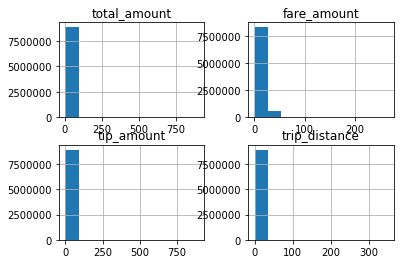

In [65]:
pd_numeric_yellow.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f1003d730>,
      dtype=object)

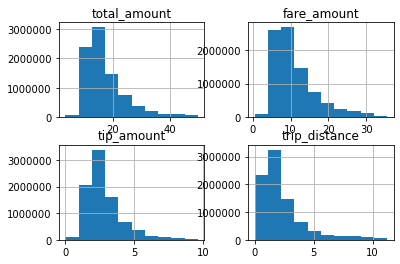

In [68]:
# Code taken from https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
# Searched for 'remove outliers pd df'
# Code calculates the z-score for each value column-wise and filters out any values outside of 2 standard deviations

from scipy import stats
import numpy as np

pd_numeric_yellow = pd_numeric_yellow[(np.abs(stats.zscore(pd_numeric_yellow)) < 2).all(axis=1)]
pd_numeric_yellow.hist()

# Not sure why the axes are messed up, tried playing around with it but couldn't figure it out
# Not worth investing more time since I'm not going to use these visualisations in report, but I took the array of column 
# values and plotted them in R, got a similar shape, so it worked at least

In [71]:
yellow.printSchema()

root
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- ratecode_id: integer (nullable = true)
 |-- pulocation_id: integer (nullable = true)
 |-- dolocation_id: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)



# ENDED HERE

Need to concat temp column onto other one

In [73]:
temp_non_numeric = yellow
temp_non_numeric = temp_non_numeric.drop('tpep_pickup_datetime', 'tpep_dropoff_datetime')
print(f'Number of rows in non-numerical yellow: {temp_non_numeric.count()}')



'''sdf_numeric_yellow = spark.createDataFrame(pd_numeric_yellow)
print(f'Number of rows in numerical yellow: {sdf_numeric_yellow.count()}')

yellow = temp_non_numeric.union(sdf_numeric_yellow)
print(f'Number of rows in concatenated yellow: {yellow.count()}')'''

Number of rows in non-numerical yellow: 8933245
22/08/26 01:47:44 WARN TaskSetManager: Stage 135 contains a task of very large size (54603 KiB). The maximum recommended task size is 1000 KiB.


Number of rows in numerical yellow: 8596575


AnalysisException: Union can only be performed on tables with the same number of columns, but the first table has 8 columns and the second table has 4 columns;
'Union false, false
:- Project [trip_distance#276, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:  +- Filter (tip_amount#285 > cast(0 as double))
:     +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:        +- Filter (fare_amount#282 > cast(0 as double))
:           +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:              +- Filter (trip_distance#276 > cast(0 as double))
:                 +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                    +- Filter (total_amount#288 > cast(0 as double))
:                       +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                          +- Filter (payment_type#281L = cast(1 as bigint))
:                             +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                +- Union false, false
:                                   :- Filter (ratecode_id#775 = 1)
:                                   :  +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :     +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, pulocation_id#786, cast(dolocation_id#675L as int) AS dolocation_id#797, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :        +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#775, cast(pulocation_id#664L as int) AS pulocation_id#786, dolocation_id#675L, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :           +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, cast(ratecode_id#653 as int) AS ratecode_id#775, pulocation_id#664L, dolocation_id#675L, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :              +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#653, pulocation_id#664L, DOLocationID#280L AS dolocation_id#675L, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :                 +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, ratecode_id#653, PULocationID#279L AS pulocation_id#664L, DOLocationID#280L, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :                    +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, RatecodeID#277 AS ratecode_id#653, PULocationID#279L, DOLocationID#280L, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :                       +- Project [tpep_pickup_datetime#273, tpep_dropoff_datetime#274, trip_distance#276, RatecodeID#277, PULocationID#279L, DOLocationID#280L, payment_type#281L, fare_amount#282, tip_amount#285, total_amount#288]
:                                   :                          +- Relation [VendorID#272L,tpep_pickup_datetime#273,tpep_dropoff_datetime#274,passenger_count#275,trip_distance#276,RatecodeID#277,store_and_fwd_flag#278,PULocationID#279L,DOLocationID#280L,payment_type#281L,fare_amount#282,extra#283,mta_tax#284,tip_amount#285,tolls_amount#286,improvement_surcharge#287,total_amount#288,congestion_surcharge#289,airport_fee#290] parquet
:                                   +- Project [tpep_pickup_datetime#874 AS tpep_pickup_datetime#892, tpep_dropoff_datetime#875 AS tpep_dropoff_datetime#893, trip_distance#877 AS trip_distance#894, ratecode_id#775 AS ratecode_id#895, pulocation_id#786 AS pulocation_id#896, dolocation_id#797 AS dolocation_id#897, payment_type#882L AS payment_type#898L, fare_amount#883 AS fare_amount#899, tip_amount#886 AS tip_amount#900, total_amount#889 AS total_amount#901]
:                                      +- Filter (ratecode_id#775 = 6)
:                                         +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, ratecode_id#775, pulocation_id#786, dolocation_id#797, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                            +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, ratecode_id#775, pulocation_id#786, cast(dolocation_id#675L as int) AS dolocation_id#797, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                               +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, ratecode_id#775, cast(pulocation_id#664L as int) AS pulocation_id#786, dolocation_id#675L, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                                  +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, cast(ratecode_id#653 as int) AS ratecode_id#775, pulocation_id#664L, dolocation_id#675L, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                                     +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, ratecode_id#653, pulocation_id#664L, DOLocationID#881L AS dolocation_id#675L, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                                        +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, ratecode_id#653, PULocationID#880L AS pulocation_id#664L, DOLocationID#881L, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                                           +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, RatecodeID#878 AS ratecode_id#653, PULocationID#880L, DOLocationID#881L, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                                              +- Project [tpep_pickup_datetime#874, tpep_dropoff_datetime#875, trip_distance#877, RatecodeID#878, PULocationID#880L, DOLocationID#881L, payment_type#882L, fare_amount#883, tip_amount#886, total_amount#889]
:                                                                 +- Relation [VendorID#873L,tpep_pickup_datetime#874,tpep_dropoff_datetime#875,passenger_count#876,trip_distance#877,RatecodeID#878,store_and_fwd_flag#879,PULocationID#880L,DOLocationID#881L,payment_type#882L,fare_amount#883,extra#884,mta_tax#885,tip_amount#886,tolls_amount#887,improvement_surcharge#888,total_amount#889,congestion_surcharge#890,airport_fee#891] parquet
+- LogicalRDD [total_amount#1987, fare_amount#1988, tip_amount#1989, trip_distance#1990], false


## 5. Unit Conversion

- `[pu/do]location_id`: Geometry conversion as covered in Tutorial 2
- `trip_distance`: Units are American - convert to metric units

In [70]:
# Miles -> KM : 1.6 * miles = km
yellow.limit(2)

tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,ratecode_id,pulocation_id,dolocation_id,payment_type,fare_amount,tip_amount,total_amount
2022-01-01 00:35:40,2022-01-01 00:53:29,3.8,1,142,236,1,14.5,3.65,21.95
2022-01-01 00:33:43,2022-01-01 00:42:07,2.1,1,236,42,1,8.0,4.0,13.3


### Converting PU/DOLocation to Geometry 
Code attributed to tute2

# How come this code doesn't work?

sdf.select(column).distinct().show()

In [ ]:
aggregated_results = sdf \
                    .groupBy("passenger_count") \
                    .agg(
                        F.mean("total_amount").alias("avg_trip_amount_usd"),
                        F.max("trip_distance").alias("max_trip_distance_miles")
                    ) \
                    .orderBy("passenger_count")

aggregated_results.show()